In [1]:
import pandas as pd
import requests
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

# stars_by_birthyear

In [13]:
year = 1950
dfStarsBirth = pd.read_json(f'http://localhost:8000/stars/by_birthyear/{year}')
dfStarsBirth.set_index('id', inplace=True)
dfStarsBirth

#En 1950, il y a 123 acteurs qui sont nés.

,name,birthdate
id,,
321,Gabriel Byrne,1950-01-01
438,Ed Harris,1950-01-01
461,Michael Ironside,1950-01-01
484,John Landis,1950-01-01
513,William H. Macy,1950-01-01
...,...,...
958387,Jerry Zucker,1950-01-01
1715142,Prazeres Barbosa,1950-01-01
2743688,Rick Blanchard,1950-01-01


# movies_by_title_part

In [3]:
title_part="Star"
dfMovies = pd.read_json(f'http://localhost:8000/movies/by_title?t={title_part}')
dfMovies.set_index('id', inplace=True)
dfMovies

#On obtient tout les films comprenant le mot "Star"

,title,year,duration
id,,,
25830,The Star Packer,1934,53.0
49793,Star in the Dust,1956,80.0
76759,Star Wars: Episode IV - A New Hope,1977,121.0
80684,Star Wars: Episode V - The Empire Strikes Back,1980,124.0
86190,Star Wars: Episode VI - Return of the Jedi,1983,131.0
95405,Starry is the Night,1988,94.0
778043,Seeing Stars,1927,NaN
2488496,Star Wars: Episode VII - The Force Awakens,2015,138.0
2527338,Star Wars: Episode IX - The Rise of Skywalker,2019,142.0


# stats par acteur

In [4]:
min_count=20
dfStars_stats = pd.read_json(f'http://localhost:8000/stars/stats_movie_by_stars?minc={min_count}')
dfStars_stats

,name,count movies,first movie year,last movie year
0,John Wayne,172,1926,1976
1,Harrison Ford,86,1915,1932
2,Sean Connery,73,1954,2012
3,Sylvester Stallone,73,1969,2019
4,Tom Hanks,69,1980,2020
5,Jean-Claude Van Damme,66,1979,2019
6,Harrison Ford,63,1966,2020
7,Clint Eastwood,63,1955,2018
8,Arnold Schwarzenegger,56,1970,2019
9,Will Smith,50,1988,2020


# Repartition par année des films

<AxesSubplot:xlabel='0'>

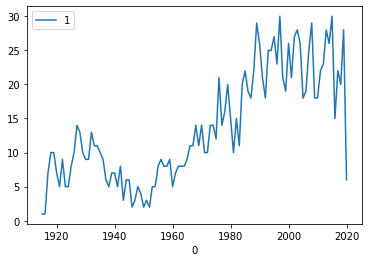

In [5]:
dfStatsByYear = pd.read_json('http://localhost:8000/movies/count_by_year')
dfStatsByYear.set_index(0, inplace=True)
dfStatsByYear.plot()

In [11]:
limit = 1000
dfStars = pd.read_json(f'http://localhost:8000/stars?limit={limit}', convert_dates=['birthdate'])
dfStars.set_index('id', inplace=True)
dfStars

,name,birthdate
id,,
1,Fred Astaire,1899-01-01
2,Lauren Bacall,1924-01-01
3,Brigitte Bardot,1934-01-01
4,John Belushi,NaT
6,Ingrid Bergman,1915-01-01
...,...,...
1480,Shelley Long,NaT
1484,Jon Lovitz,1957-01-01
1485,Myrna Loy,1905-01-01


<AxesSubplot:xlabel='birthdate'>

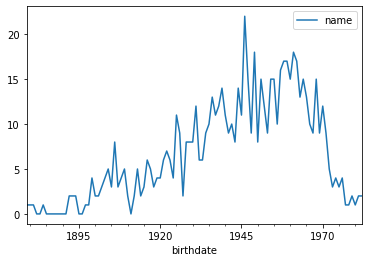

In [12]:
dfStatsBirthByYear = dfStars.groupby(pd.Grouper(key='birthdate', freq='Y')).count()
dfStatsBirthByYear.plot()

On obtient le nombre de naissance de star selon l'année

# diagramme barres carrière du top 10 acteurs

<AxesSubplot:xlabel='name'>

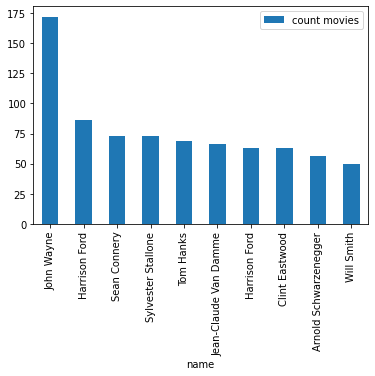

In [7]:
dfStars_stats_top = dfStars_stats[:10]
statsToPlot1 = dfStars_stats_top[['name','count movies']].set_index('name')
statsToPlot1.plot(kind='bar')

<AxesSubplot:xlabel='name'>

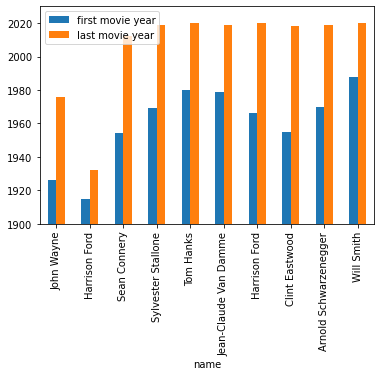

In [21]:
fig, ax = plt.subplots()
dfStars_stats_top = dfStars_stats[:10]
statsToPlot2 = dfStars_stats_top[['name','first movie year','last movie year']] \
.set_index('name')
ax.set_ylim(1900,2030)
statsToPlot2.plot(kind='bar', ax=ax)